<a href="https://colab.research.google.com/github/SAMRIDDHI-PAUL/Sentiment-Analysis-of-Covid-Vaccine/blob/main/covid%20Vaccine%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING MODULES 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install neattext
import neattext as ntx  #text processing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# *FETCHING DATASET*
(dataset from kaggle) 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!touch /content/gdrive/MyDrive/covidvaccine.zip

In [ ]:
!unzip /content/gdrive/MyDrive/covidvaccine.zip

Archive:  /content/gdrive/MyDrive/covidvaccine.zip
  inflating: covidvaccine.csv        


In [ ]:
path= '/content/covidvaccine.csv'

## LET'S ANALYSE THE DATA

In [ ]:
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [ ]:
df.shape

(394391, 13)

In [ ]:
df.isna().sum()    #checking number of null values

user_name              19
user_location       83415
user_description    21613
user_created           26
user_followers         48
user_friends           48
user_favourites        48
user_verified          48
date                   50
text                   48
hashtags            61683
source               2460
is_retweet             69
dtype: int64

In [ ]:
from datetime import datetime,date

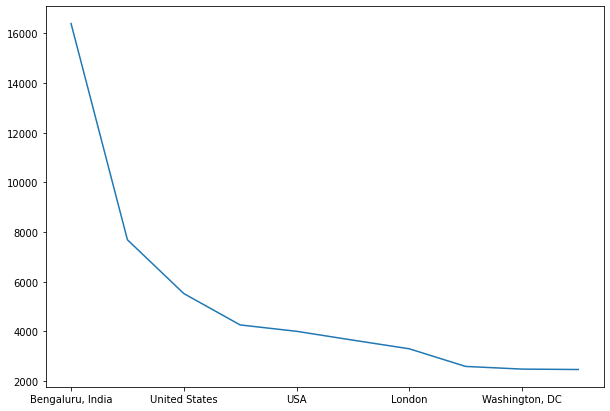

In [ ]:
plt.figure(figsize=(10,7))
df['user_location'].value_counts().nlargest(10).plot(kind='line')

In [ ]:
df=df.drop_duplicates('text')
df.shape

(393998, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393998 entries, 0 to 394390
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         393979 non-null  object 
 1   user_location     310674 non-null  object 
 2   user_description  372434 non-null  object 
 3   user_created      393998 non-null  object 
 4   user_followers    393997 non-null  float64
 5   user_friends      393997 non-null  object 
 6   user_favourites   393997 non-null  object 
 7   user_verified     393997 non-null  object 
 8   date              393996 non-null  object 
 9   text              393997 non-null  object 
 10  hashtags          332369 non-null  object 
 11  source            391591 non-null  object 
 12  is_retweet        393982 non-null  object 
dtypes: float64(1), object(12)
memory usage: 42.1+ MB


In [ ]:
df.source.value_counts()

Twitter Web App         117580
Twitter for iPhone      109302
Twitter for Android      83604
VaxBlr                   15845
Hootsuite Inc.           13313
                         ...  
OnlineMovieRatingApp         1
web-mining-test              1
fiddyshadesbot               1
sentiment_fun'''             1
BublishMe                    1
Name: source, Length: 952, dtype: int64

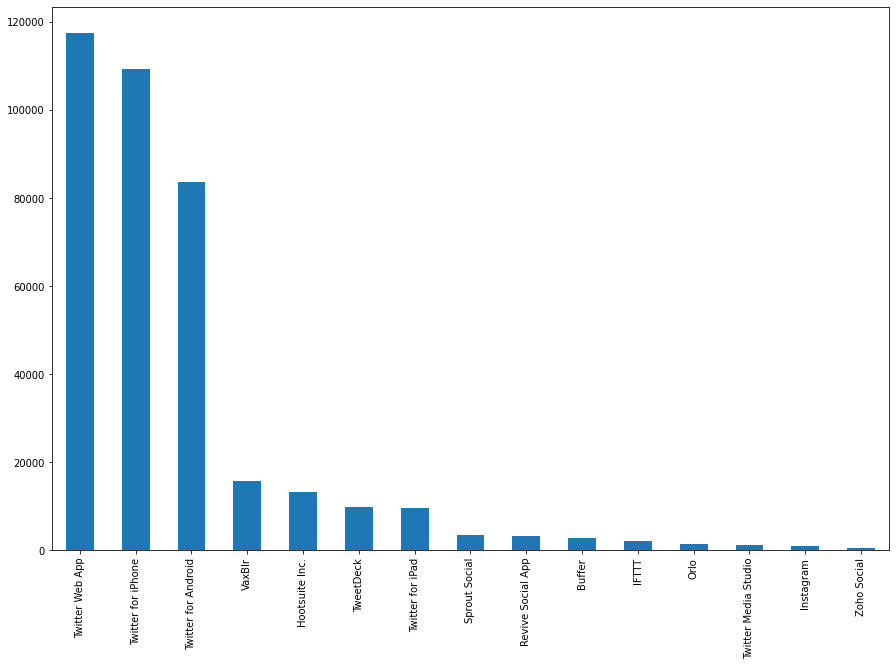

In [ ]:
plt.figure(figsize=(15,10))
df['source'].value_counts().nlargest(15).plot(kind='bar')


In [ ]:

df.user_location.value_counts()

Bengaluru, India               16393
India                           7674
United States                   5522
London, England                 4261
USA                             4005
                               ...  
Tigard, OR                         1
Jerusalemite ירושלמי مقدسي‎        1
Ma.                                1
Eagle Beach, Aruba                 1
Far reaches of my mind             1
Name: user_location, Length: 40907, dtype: int64

In [ ]:
df.sort_values(by=['date']).head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
4126,SouthSide,NaN,"‘ologist, Feminist, mother and grandmother. St...",15-10-2013 18:42,40.0,33.0,29884.0,False,01-09-2020 00:04,Don’t politicize the #CDC and the #FDA. I’m p...,"['CDC', 'FDA']",Twitter for iPhone,False
4125,Candidate PAJ,NaN,"Assuming Twitter exists in the future, let thi...",18-01-2019 02:06,2.0,166.0,41.0,False,01-09-2020 00:05,Whomever the President is needs to get the #co...,['covidvaccine'],Twitter for iPhone,False


# PRE PROCESSING OF DATA

In [ ]:
df.drop(columns={"user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","is_retweet"},inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 700)
df.head()

,user_location,date,text
0,Assam,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine
1,NaN,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY
2,NaN,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI
3,NaN,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls
4,"Adelaide, South Australia",18-08-2020 12:45,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393998 entries, 0 to 394390
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_location  310674 non-null  object
 1   date           393996 non-null  object
 2   text           393997 non-null  object
dtypes: object(3)
memory usage: 12.0+ MB


In [ ]:
df['text']=str(df['text'])

In [ ]:
df['clean_data']=df['text'].apply(ntx.remove_hashtags)


In [ ]:
df['clean_data']=df['clean_data'].apply(ntx.remove_urls)


In [ ]:
df['clean_data']=df['clean_data'].apply(ntx.remove_userhandles)

In [ ]:
df['clean_data']=df['clean_data'].apply(ntx.remove_multiple_spaces)

In [ ]:
df['clean_data']=df['clean_data'].apply(ntx.remove_special_characters)

In [ ]:
df[['clean_data','text']].head(2)

,clean_data,text
0,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...
1,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...


In [ ]:
df.head()

,user_location,date,text,clean_data
0,Assam,18-08-2020 12:55,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...
1,NaN,18-08-2020 12:55,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...
2,NaN,18-08-2020 12:46,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...
3,NaN,18-08-2020 12:45,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 1 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 2 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 3 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Ministern Australia is doing very good 4 0 Australia to Manufacture Covid19 Vaccine and give it to the Citizens for free of cost AFP quotes Prime Minis...
4,"Adelaide, South Australia",18-08-2020 12:45,0 0 Australia to Manufacture Covid-19 Vacci

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = stopwords.words('english')
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [ ]:
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [ ]:
df['clean_data'] = df['clean_data'].apply(lambda x: stopWords(x))

In [ ]:
df.head(2)

,user_location,date,text,clean_data
0,Assam,18-08-2020 12:55,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 1 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 2 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 3 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 4 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 394386 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 394387 0 Australia Manufacture Covid19 Vacc...
1,NaN,18-08-2020 12:55,0 0 Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine\n1 #CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY\n2 ...,0 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 1 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 2 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 3 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 4 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 394386 0 Australia Manufacture Covid19 Vaccine give Citizens free cost AFP quotes Prime Ministern Australia good 394387 0 Australia Manufacture Covid19 Vacc...


In [ ]:
from textblob import TextBlob

def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [ ]:
blob_fun('thank god,i tested negative for covid')

{'polarity': -0.3, 'sentiment': 'Negative', 'subjectivity': 0.4}

In [ ]:
blob_fun(df['clean_data'][5])

{'polarity': 0.55, 'sentiment': 'Positive', 'subjectivity': 0.7000000000000002}

In [ ]:
df['results'] = df['clean_data'].apply(blob_fun)

In [ ]:
df.drop(columns={"user_location",'text'},inplace=True)

In [ ]:
df = df.join(pd.json_normalize(df=df['results']))

In [ ]:
df.head()

In [ ]:
positive_tweet =  df[df['sentiment'] == 'Positive']['clean_data']
negative_tweet =  df[df['sentiment'] == 'Negative']['clean_data']
neutral_tweet =  df[df['sentiment'] == 'Neutral']['clean_data']

In [ ]:
from wordcloud import WordCloud
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat if tweet not in list1])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

In [ ]:
plt.figure(figsize = (10,8))
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

In [ ]:
list1 =['I','amp','AGE','vaccine','dose','The','got','Dose','Doses','Im','2','1','get','all','HOSPITAL','A','like','one','No','All']
token = 0
positive_tokens = [token for line in positive_tweet for token in line.split()if token not in list1]
negative_tokens = [token for line in negative_tweet for token in line.split()if token not in list1]
neutral_tokens = [token for line in neutral_tweet for token in line.split()if token not in list1]

In [ ]:
from collections import Counter
def get_maxtoken(tweets,num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)
def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  # plt.figure(figsize = (20,5))
  # plt.title(title)
  # plt.xticks(rotation=45)
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()

In [ ]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')
fig = px.scatter(data,x='polarity',y='subjectivity')
fig.show()
def percent(x,y):
  return print("Percentage of "+y+" tweets :",round(len(x)/data.shape[0]*100,3),"%")
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')